인플레이션이 국내 철강 분야에 미치는 영향

In [2]:
# 모듈 설치 및 데이터 주소 설정
import pandas as pd
import matplotlib.pyplot as plt
import re
import platform
import numpy as np
import datetime as dt
path_price ='./data/소비자물가지수_2020100__20220720105502.xlsx'
path_oil ='./data/원유가격_202107_202206.xlsx'
path_steel ='./data/철광석_가격.xlsx'
path_charge ='./data/상하이컨테이너운임지수_2022.xlsx'

# 데이터 전처리

1. 철강 가격 데이터프레임 전처리

In [3]:
df_steel = pd.read_excel(path_steel,thousands=',')
#df_steel['기준일'] = pd.to_datetime(df_steel['기준일']) 
df_steel = df_steel.rename(columns ={'기준일':'기간'})  
df_steel['기간'] = df_steel['기간'].astype(str)
df_steel['기간'] = df_steel['기간'].apply(lambda x : x.replace("-",'.'))
df_steel['기간'] = df_steel['기간'].str[:-3]
df_steel['기준가격'] = df_steel['기준가격'].astype(int)
# df_steel['기간'] = df_steel['기간'][:-3]
# df_steel
df_steel = df_steel.groupby(['기간'])['기준가격'].mean()
df_steel

기간
2021.07    212.00
2021.08    160.00
2021.09    124.00
2021.10    119.60
2021.11     94.25
2021.12    113.80
2022.01    131.00
2022.02    142.25
2022.03    147.75
2022.04    150.80
2022.05    132.75
2022.06    131.25
Name: 기준가격, dtype: float64

2. 소비자물가 데이터프레임 전처리

In [4]:
df_price = pd.read_excel(path_price)
df_price = df_price.rename(columns={"시도별":"기간"})
df_price = df_price.set_index('기간')
df_price = df_price.transpose()
df_price = df_price.rename(columns={"전국":"소비자물가"})

df_price_series = df_price['소비자물가']
df_price_series  

C:\Users\alstn\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


2021.07    102.26
2021.08    102.75
2021.09    103.17
2021.10    103.35
2021.11    103.87
2021.12    104.04
2022.01    104.69
2022.02    105.30
2022.03    106.06
2022.04    106.85
2022.05    107.56
2022.06    108.22
Name: 소비자물가, dtype: float64

3. 원유가격 데이터프레임 전처리

In [5]:
df_oil = pd.read_excel(path_oil)

df_oil = df_oil.rename(columns={'구 분':'기간'})


df_oil = df_oil.set_index('기간')

df_oil = df_oil[['WTI']]
df_oil = df_oil.rename(columns={'WTI':'원유가격'})
df_oil = df_oil.sort_index(ascending=True)
df_oil.index = df_oil.index.astype(str)
df_oil = df_oil.rename(index={'2021.1':'2021.10'})

print(df_oil)
print(df_oil.index)

           원유가격
기간             
2021.07   72.43
2021.08   67.71
2021.09   71.54
2021.10   81.22
2021.11   78.65
2021.12   71.69
2022.01   82.98
2022.02   91.63
2022.03  108.26
2022.04  101.64
2022.05  109.26
2022.06  114.34
Index(['2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12',
       '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06'],
      dtype='object', name='기간')


4. 운임지수 데이터프레임 전처리

In [6]:
df_charge = pd.read_excel(path_charge)
df_price = df_price.reset_index(drop=True)
#
df_charge = df_charge.astype(float)
df_charge = df_charge.transpose()

df_charge.index = df_charge.index.str[:7]
df_charge_month = df_charge.groupby([df_charge.index])[0].mean()

df_charge_month = df_charge_month.iloc[6:-1]
df_charge_month

2021.07    4037.630000
2021.08    4308.297500
2021.09    4590.242000
2021.10    4596.585000
2021.11    4561.785000
2021.12    4887.068000
2022.01    5066.860000
2022.02    4915.136667
2022.03    4586.605000
2022.04    4242.860000
2022.05    4162.402500
2022.06    4219.852500
Name: 0, dtype: float64

# 1. 철광석과 연관된 인플레이션 관련 지표 그래프 분석

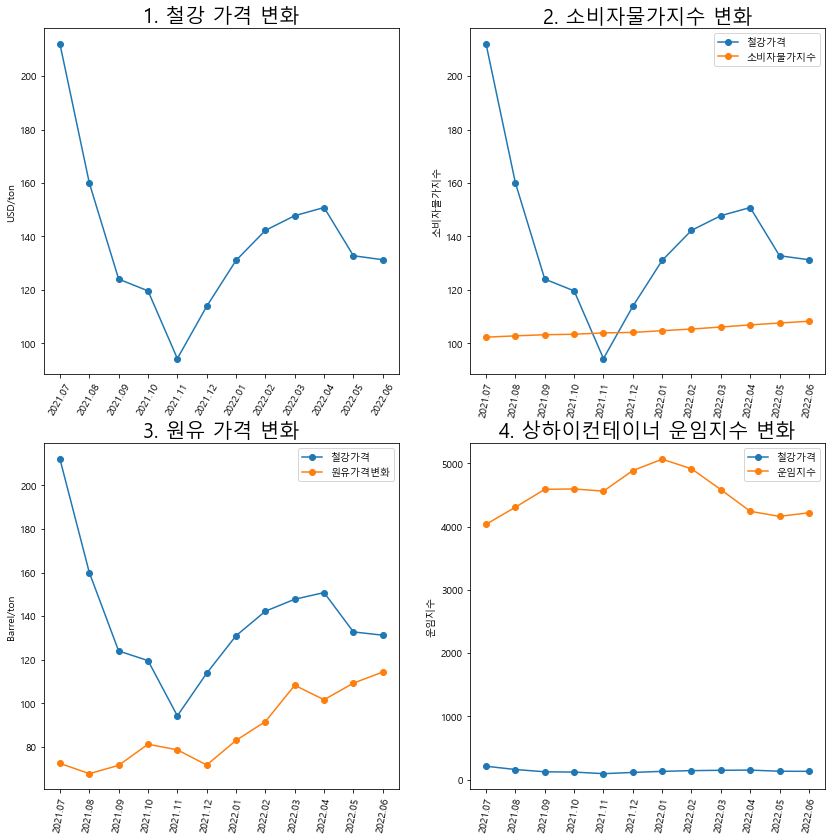

In [7]:
if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

fig, axes = plt.subplots(2,2, figsize=(14, 14))

plt.subplot(2,2,1)
plt.plot(df_steel ,marker='o')
plt.xticks(rotation=60) 
plt.ylabel('USD/ton')
plt.title('1. 철강 가격 변화',fontsize=20)

plt.subplot(2,2,2)
plt.plot(df_steel ,marker='o')
plt.plot(df_price_series,marker='o')
plt.xticks(rotation=80)
plt.ylabel('소비자물가지수')
plt.legend(['철강가격','소비자물가지수'])
plt.title('2. 소비자물가지수 변화',fontsize=20)

plt.subplot(2,2,3)
plt.plot(df_steel ,marker='o')
plt.plot(df_oil,marker='o')
plt.xticks(rotation=80)
plt.ylabel('Barrel/ton')
plt.legend(['철강가격','원유가격변화'])
plt.title('3. 원유 가격 변화',fontsize=20)

plt.subplot(2,2,4)
plt.plot(df_steel ,marker='o')
plt.plot(df_charge_month,marker='o')
plt.xticks(rotation=80)
plt.title('4. 상하이컨테이너 운임지수 변화',fontsize=20)
plt.legend(['철강가격','운임지수'])
plt.ylabel('운임지수')
plt.show()


결과 : 철광석 원자재의 가격은 원유, 운임지수, 소비자물가 지수에 큰 영향을 받지 않는 것으로 보인다.

# 2. 상관관계 분석 및 정규화를 통한 그래프 통합 

           철강가격      운임지수     소비자물가      원유가격
철강가격   1.000000 -0.518717 -0.191854 -0.056490
운임지수  -0.518717  1.000000 -0.176041 -0.256634
소비자물가 -0.191854 -0.176041  1.000000  0.949790
원유가격  -0.056490 -0.256634  0.949790  1.000000


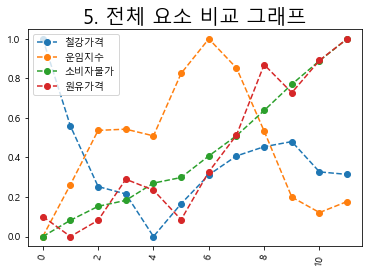

In [8]:
# 데이터 통합
df_total = pd.concat([df_steel,df_charge_month,df_price_series,df_oil],axis=1)
df_total = df_total.rename(columns={0:'운임지수','기준가격':'철강가격'})
df_total
print(df_total.corr())

# 정규화
#!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_total2 = df_total.copy()
df_total2 = scaler.fit_transform(df_total2)

# 정규화 이후 종합 그래프 생성
plt.Figure(figsize=(12,14))
plt.plot(df_total2,marker='o',linestyle='--')
plt.xticks(rotation=80)
plt.title('5. 전체 요소 비교 그래프',fontsize=20)
plt.legend(['철강가격','운임지수','소비자물가','원유가격'])
plt.show()

결과: 상관관계를 이용한 데이터를 봤을 때, 철강의 가격은 원유가격, 소비자물가와는 연관이 거의 없는 것으로 추측할 수 있다.
      

# 3. 국내 철강기업 이익 분석
- 철강기업 주가, 영업이익 데이터 전처리

In [9]:
path_posco ='./data/포스코_주식.csv'
path_hyundae='./data/현재제철_주가.csv'
path_dongguk = './data/동국제강_주가.csv'

#  포스코 주가
df_posco = pd.read_csv(path_posco,thousands=",")
df_posco['날짜'] = df_posco['날짜'].str[:4] + '.' + df_posco['날짜'].str[6:8] 
df_posco['종가'].astype(int)
df_posco = df_posco.rename(columns={'종가':'가격'})
df_posco = df_posco.groupby(['날짜'])['가격'].mean()
df_posco = df_posco.loc['2021.07':]

# 현대제철 주가
df_hyundae = pd.read_csv(path_hyundae,thousands=",")
df_hyundae['날짜'] = df_hyundae['날짜'].str[:4] + '.' + df_hyundae['날짜'].str[6:8] 
df_hyundae['종가'].astype(int)
df_hyundae = df_hyundae.rename(columns={'종가':'가격'})
df_hyundae = df_hyundae.groupby(['날짜'])['가격'].mean()
df_hyundae = df_hyundae.loc['2021.07':]

# 동국제강 주가
df_dongguk = pd.read_csv(path_dongguk,thousands=",")
df_dongguk['날짜'] = df_dongguk['날짜'].str[:4] + '.' + df_dongguk['날짜'].str[6:8] 
df_dongguk['종가'].astype(int)
df_dongguk = df_dongguk.rename(columns={'종가':'가격'})
df_dongguk = df_dongguk.groupby(['날짜'])['가격'].mean()
df_dongguk = df_dongguk.loc['2021.07':]

# 국내 철강 3대 기업 주가 정규화
df_company = pd.concat([df_posco,df_hyundae,df_dongguk], axis=1)
scaler = MinMaxScaler()
df_company2 = df_company.copy()
df_company2 = scaler.fit_transform(df_company)

# 철강기업 영업이익
df_money = pd.read_excel('./data/영업이익.xlsx')
df_money = df_money.rename(columns={'Unnamed: 0':''}) 
df_money = df_money.set_index('')
df_money = df_money.transpose()
df_money = df_money.astype(int)
print(df_money)

# 철강기업 영업이익 정규화
scaler = MinMaxScaler()
df_money2 = df_money.copy()
df_money2 = scaler.fit_transform(df_money)
print(type(df_money2))

           포스코  현대제철  동국제강
2021.03  15524  3039  1094
2021.06  22006  5453  2070
2021.09  31167  8262  2985
2021.12  23683  7721  1881
2022.03  22576  6974  2058
2022.06  20347  8141  2236
<class 'numpy.ndarray'>


# 철강기업 주가 및 영업이익 그래프, 상관관계

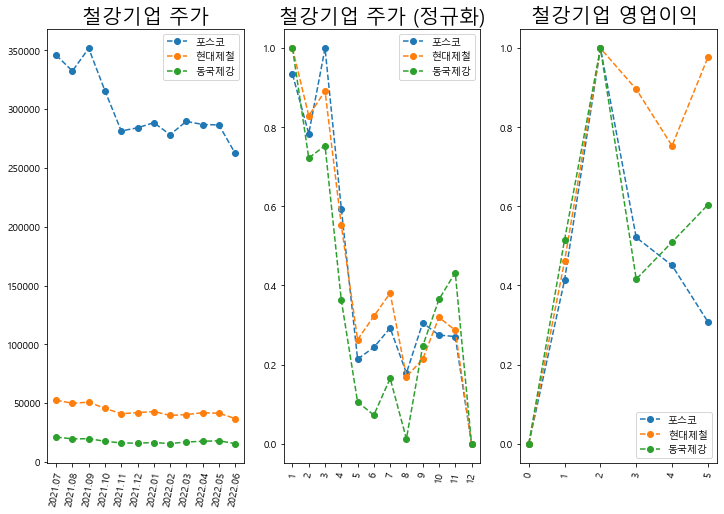

,철강가격,운임지수,소비자물가,원유가격,포스코,현대제철,동국제강
철강가격,1.000000,-0.518717,-0.191854,-0.056490,0.467803,0.509756,0.661852
운임지수,-0.518717,1.000000,-0.176041,-0.256634,-0.255896,-0.262584,-0.554070
소비자물가,-0.191854,-0.176041,1.000000,0.949790,-0.766091,-0.805262,-0.555817
원유가격,-0.056490,-0.256634,0.949790,1.000000,-0.672323,-0.740958,-0.455838
포스코,0.467803,-0.255896,-0.766091,-0.672323,1.000000,0.979993,0.919677
현대제철,0.509756,-0.262584,-0.805262,-0.740958,0.979993,1.000000,0.925392
동국제강,0.661852,-0.554070,-0.555817,-0.455838,0.919677,0.925392,1.000000


In [11]:
# 철강기업 주가 그래프 생성
if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')

fig, axes = plt.subplots(2,2, figsize=(12, 8))

# 1. 철강기업 주가 그래프
plt.subplot(1,3,1)
plt.Figure(figsize=(5,8))
plt.plot(df_posco,marker='o',linestyle='--')
plt.plot(df_hyundae,marker='o',linestyle='--')
plt.plot(df_dongguk,marker='o',linestyle='--')
plt.xticks(rotation=80)
plt.title('철강기업 주가',fontsize=20)
plt.legend(['포스코','현대제철','동국제강'])

# 철강기업 주가 정규화 그래프
plt.subplot(1,3,2)
plt.Figure(figsize=(5,8))
plt.plot(df_company2,marker='o',linestyle='--')
plt.xticks(rotation=80)
plt.title('철강기업 주가 (정규화)',fontsize=20)
plt.legend(['포스코','현대제철','동국제강'])

# 철강기업 영업이익 그래프
plt.subplot(1,3,3)
plt.Figure(figsize=(5,8))
plt.plot(df_money2,marker='o',linestyle='--')
#plt.plot(df_money2['현대제철'],marker='o',linestyle='--')
#plt.plot(df_money2['동국제강'],marker='o',linestyle='--')
plt.xticks(rotation=80)
plt.title('철강기업 영업이익 ',fontsize=20)
plt.legend(['포스코','현대제철','동국제강'])
#plt.xticks(range())
plt.show()

# 각 요소와 철강기업 주가와의 상관관계
df_last = pd.concat([df_total,df_company],axis=1)
df_last.columns=['철강가격'	,'운임지수','소비자물가','원유가격'	,'포스코','현대제철','동국제강']
df_last.corr()

[결과] 인플레이션 상황 속에서 국내 대표 철강기업들의 특징.
- 철강 원자재 가격 자체는 소비자물가와 상관관계가 거의 없었지만, 포스코와 현대제철은 철강기업의 주가는 소비자물가와 꽤 높은 상관관계를 가진다.
- 동국제강을 중심으로 하는 동국제강은 소비자물가, 원유가격에 포스코와 현대제철에 비해 영향을 덜 받는 것으로 추측할 수 있다.